# STOCK PRICE PREDICTION USING LSTM AND GRU

In [1]:
#importing required modules for data collection and preprocessing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

### DATA COLLECTION

In [2]:
#Loading dataset from Yahoo website
df = yf.download('AAPL', 
                      start='2018-01-01', 
                      end='2023-01-01', 
                      progress=False,)

In [3]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

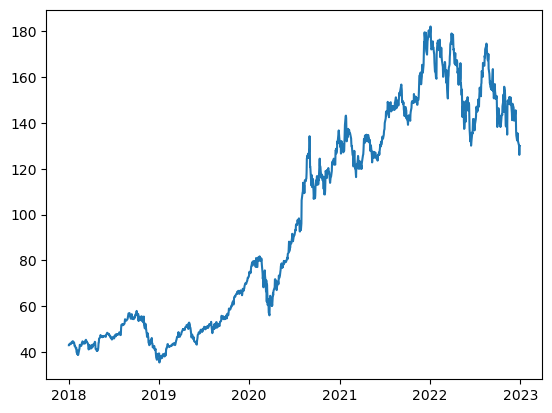

In [4]:
plt.plot(df.Close) #plotting the graph for closing price

In [5]:
ma100=df.Close.rolling(100).mean()
ma100
#calculating moving average for 100 days

Date
2018-01-02           NaN
2018-01-03           NaN
2018-01-04           NaN
2018-01-05           NaN
2018-01-08           NaN
                 ...    
2022-12-23    150.515600
2022-12-27    150.157800
2022-12-28    149.764699
2022-12-29    149.412100
2022-12-30    149.062199
Name: Close, Length: 1259, dtype: float64

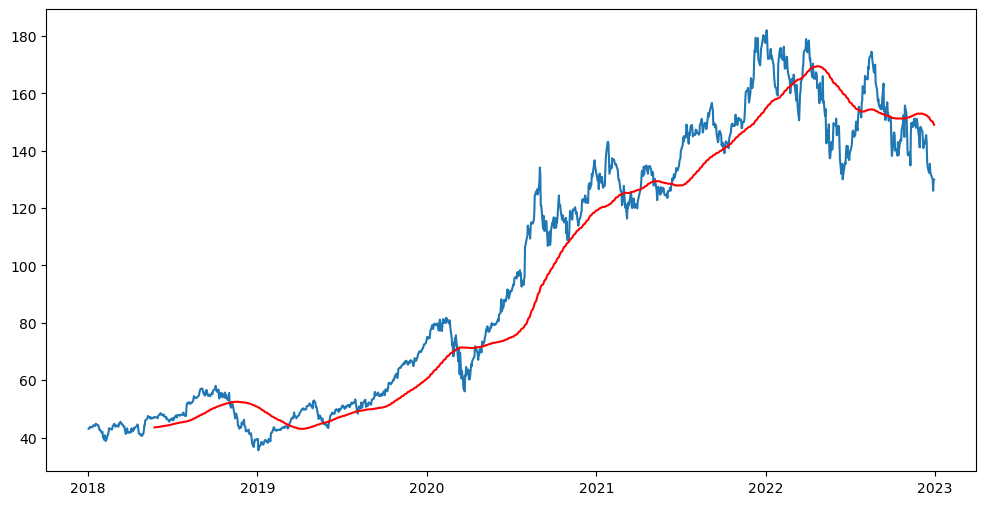

In [6]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

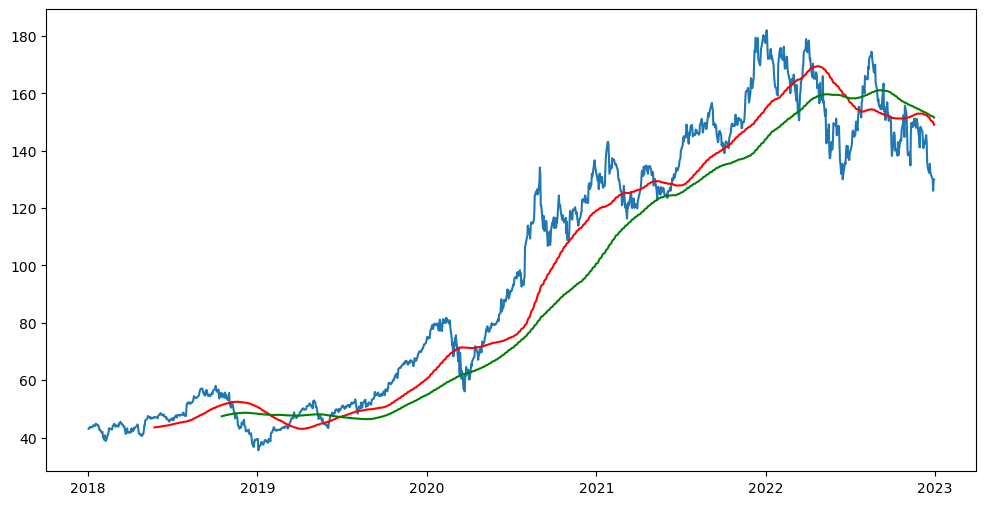

In [7]:
ma200=df.Close.rolling(200).mean()
plt.figure(figsize=(12,6))
#comparision of moving average of 200 and 100 days
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [8]:
df.shape

(1259, 6)

Splitting into Training and Testing


In [9]:
data_training=pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing=pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])
#70% is used for testing and 30 % is used for training
print(data_training.shape)
print(data_testing.shape)

(881, 1)
(378, 1)


In [10]:
data_testing.head()

,Close
Date,
2021-07-02,139.960007
2021-07-06,142.020004
2021-07-07,144.570007
2021-07-08,143.240005
2021-07-09,145.110001


### Preprocessing

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

In [12]:
data_training_array=scaler.fit_transform(data_training)

In [18]:
data_training_array

array([[0.06985711],
       [0.06978741],
       [0.07164594],
       [0.07622255],
       [0.07471252],
       [0.07466604],
       [0.0745731 ],
       [0.07687303],
       [0.08107793],
       [0.0789871 ],
       [0.08574748],
       [0.08611916],
       [0.08426066],
       [0.08086885],
       [0.08096176],
       [0.0744105 ],
       [0.0671855 ],
       [0.06811474],
       [0.05986759],
       [0.05756766],
       [0.05863629],
       [0.0594494 ],
       [0.04253687],
       [0.03322105],
       [0.04841444],
       [0.04030663],
       [0.03010801],
       [0.0330352 ],
       [0.04767105],
       [0.05145776],
       [0.0584969 ],
       [0.07155303],
       [0.07025204],
       [0.06890464],
       [0.06709259],
       [0.07041467],
       [0.07738413],
       [0.08544546],
       [0.08409803],
       [0.08347077],
       [0.07622255],
       [0.07903358],
       [0.0804507 ],
       [0.08010221],
       [0.07629224],
       [0.08072947],
       [0.08779183],
       [0.091

In [19]:
data_training_array.shape

(881, 1)

In [13]:
x_train=[]
y_train=[]
for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])
x_train,y_train=np.array(x_train),np.array(y_train)

# LSTM MODEL IMPLEMENTATION


In [14]:
from keras.models import Sequential
from keras.layers import LSTM, Dropout,Dense

In [15]:
model=Sequential()
model.add(LSTM(units=50,activation='relu',return_sequences=True,input_shape=(x_train.shape  [1],1)))#introduces non linearity to the model 
model.add(Dropout(0.2))

model.add(LSTM(units=60,activation='relu',return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80,activation='relu',return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))#to connect all the layers

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [36]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train,epochs=50)


Epoch 1/50
25/25 [==============================] - 9s 186ms/step - loss: 0.0067
Epoch 2/50
25/25 [==============================] - 5s 184ms/step - loss: 0.0060
Epoch 3/50
25/25 [==============================] - 5s 191ms/step - loss: 0.0055
Epoch 4/50
25/25 [==============================] - 5s 191ms/step - loss: 0.0052
Epoch 5/50
25/25 [==============================] - 5s 187ms/step - loss: 0.0048
Epoch 6/50
25/25 [==============================] - 5s 190ms/step - loss: 0.0052
Epoch 7/50
25/25 [==============================] - 5s 192ms/step - loss: 0.0049
Epoch 8/50
25/25 [==============================] - 5s 199ms/step - loss: 0.0049
Epoch 9/50
25/25 [==============================] - 5s 196ms/step - loss: 0.0041
Epoch 10/50
25/25 [==============================] - 5s 205ms/step - loss: 0.0049
Epoch 11/50
25/25 [==============================] - 6s 229ms/step - loss: 0.0045
Epoch 12/50
25/25 [==============================] - 6s 237ms/step - loss: 0.0041
Epoch 13/50
25/25 [======

In [ ]:
model.save('keras_model.h5')

## GRU MODEL IMPLEMENTATION

In [37]:
from keras.layers import GRU
gru_model=Sequential()
gru_model.add(GRU(units=50, return_sequences=True, input_shape=(x_train.shape[1],1), activation='relu'))
gru_model.add(Dropout(0.2))
# Second GRU layer
gru_model.add(GRU(units=60, return_sequences=True, input_shape=(x_train.shape[1],1), activation='relu'))
gru_model.add(Dropout(0.3))
# Third GRU layer
gru_model.add(GRU(units=80, return_sequences=True, input_shape=(x_train.shape[1],1), activation='relu'))
gru_model.add(Dropout(0.4))
# Fourth GRU layer
gru_model.add(GRU(units=120, activation='relu'))
gru_model.add(Dropout(0.5))
# The output layer
gru_model.add(Dense(units=1))
# Compiling the RNN

In [38]:
gru_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 100, 50)           7950      
                                                                 
 dropout_4 (Dropout)         (None, 100, 50)           0         
                                                                 
 gru_1 (GRU)                 (None, 100, 60)           20160     
                                                                 
 dropout_5 (Dropout)         (None, 100, 60)           0         
                                                                 
 gru_2 (GRU)                 (None, 100, 80)           34080     
                                                                 
 dropout_6 (Dropout)         (None, 100, 80)           0         
                                                                 
 gru_3 (GRU)                 (None, 120)              

In [48]:
gru_model.compile(optimizer='adam',loss='mean_squared_error')
# Fitting to the training set
gru_model.fit(x_train,y_train,epochs=50)

Epoch 1/50
25/25 [==============================] - 10s 172ms/step - loss: 0.0978
Epoch 2/50
25/25 [==============================] - 5s 207ms/step - loss: 0.0142
Epoch 3/50
25/25 [==============================] - 5s 216ms/step - loss: 0.0108
Epoch 4/50
25/25 [==============================] - 4s 172ms/step - loss: 0.0095
Epoch 5/50
25/25 [==============================] - 4s 173ms/step - loss: 0.0083
Epoch 6/50
25/25 [==============================] - 6s 253ms/step - loss: 0.0082
Epoch 7/50
25/25 [==============================] - 8s 309ms/step - loss: 0.0081
Epoch 8/50
25/25 [==============================] - 6s 225ms/step - loss: 0.0061
Epoch 9/50
25/25 [==============================] - 6s 228ms/step - loss: 0.0078
Epoch 10/50
25/25 [==============================] - 6s 225ms/step - loss: 0.0062
Epoch 11/50
25/25 [==============================] - 6s 229ms/step - loss: 0.0066
Epoch 12/50
25/25 [==============================] - 6s 239ms/step - loss: 0.0068
Epoch 13/50
25/25 [=====

In [ ]:
gru_model.save('GRU.h5')

# Testing Data


In [39]:
past_100_days=data_training.tail(100)

In [43]:
past_100_days

,Close
Date,
2021-02-09,136.009995
2021-02-10,135.389999
2021-02-11,135.130005
2021-02-12,135.369995
2021-02-16,133.190002
...,...
2021-06-25,133.110001
2021-06-28,134.779999
2021-06-29,136.330002


In [41]:
final_df=past_100_days.append(data_testing,ignore_index=True)

C:\Users\Aashmit Shrestha\AppData\Local\Temp\ipykernel_11048\3595571042.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df=past_100_days.append(data_testing,ignore_index=True)


In [42]:
final_df.head()

,Close
0,136.009995
1,135.389999
2,135.130005
3,135.369995
4,133.190002


In [44]:
input_data=scaler.fit_transform(final_df)

In [46]:
input_data.shape

(478, 1)

### Testing

In [47]:
x_test=[]
y_test=[]
for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

In [52]:
x_test,y_test=np.array(x_test),np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(378, 100, 1)
(378,)


In [53]:
#making predictions
y_predicted=model.predict(x_test)
y_predicted2=gru_model.predict(x_test)

12/12 [==============================] - 2s 64ms/step


In [54]:
sc=scaler.scale_
#gives the factor by which the values were scaled down 

In [55]:
scale_factor=1/sc

y_predicted=y_predicted*scale_factor
y_test=y_test*scale_factor
y_predicted2=y_predicted2*scale_factor

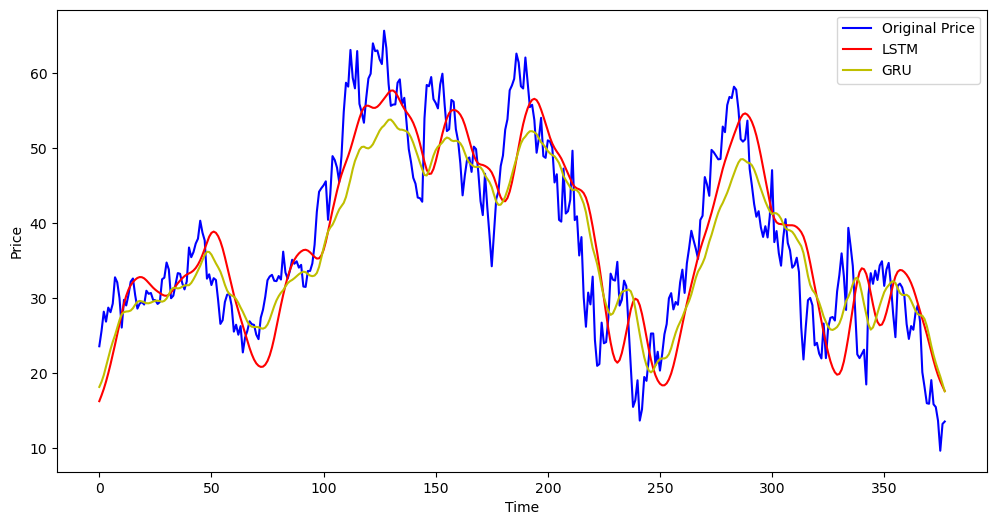

In [56]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label='Original Price')
plt.plot(y_predicted,'r',label='LSTM')
plt.plot(y_predicted2,'y',label='GRU')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

# Error Evaluation

In [50]:
import math
import numpy as np
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_absolute_percentage_error
def return_error(test,predicted):
    rmse = math.sqrt(mean_squared_error(test, predicted))
    mae=mean_absolute_error(test,predicted)
    mape=mean_absolute_percentage_error(test,predicted)
    print("The root mean squared error is {}.".format(rmse))
    print("The mean absolute error is {}.".format(mae))
    print("The mean absolute percentage error {}.".format(mape))
    return rmse,mae,mape

In [57]:
error_LSTM=return_error(y_test,y_predicted)
error_LSTM

The root mean squared error is 6.6004652050319965.
The mean absolute error is 5.4789883062325915.
The mean absolute percentage error 0.1704284437408118.


(6.6004652050319965, 5.4789883062325915, 0.1704284437408118)

In [58]:
error_GRU=return_error(y_test,y_predicted2)
error_GRU

The root mean squared error is 6.095874378104046.
The mean absolute error is 4.919367401482997.
The mean absolute percentage error 0.14486210767408475.


(6.095874378104046, 4.919367401482997, 0.14486210767408475)

In [59]:
error_df=pd.DataFrame(columns=('Model','RMSE'))
error_data=[('LSTM',error_LSTM[0],error_LSTM[1],error_LSTM[2]),('GRU',error_GRU[0],error_GRU[1],error_GRU[2])]
error_df=pd.DataFrame(error_data,columns=('Model','RMSE','MAE','MAPE'))

In [60]:
error_df
#displaying the error analysis results

,Model,RMSE,MAE,MAPE
0,LSTM,6.600465,5.478988,0.170428
1,GRU,6.095874,4.919367,0.144862
